<a href="https://colab.research.google.com/github/deva-kumari/devakumari_cse22237/blob/main/A4-C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mean Price for April: 1698.9526315789474
Population Mean Price: 1560.663453815261
The mean price for April is higher than the population mean price.
Probability of making a loss: 0.4979919678714859
Probability of making a profit on Wednesday: 0.42
Conditional probability of making a profit given that today is Wednesday: 0.08433734939759036


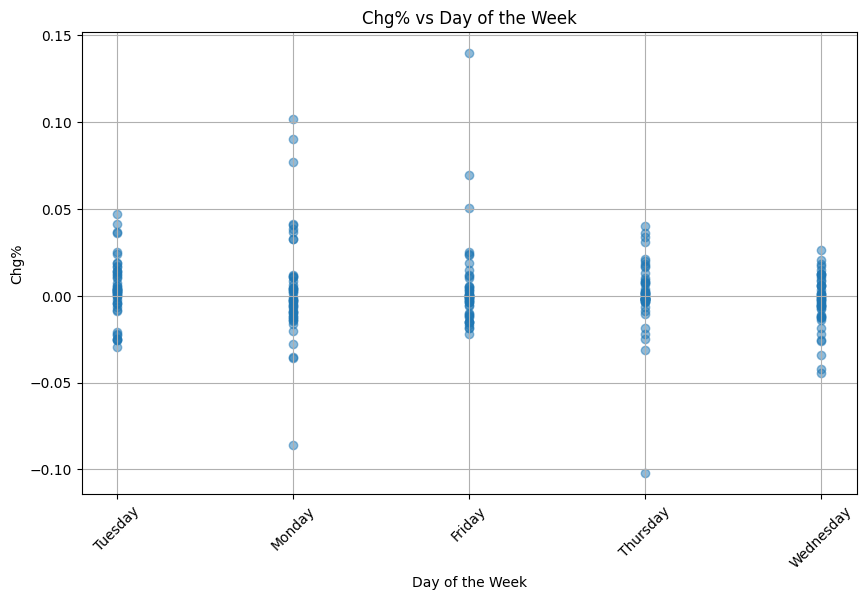

In [9]:
import pandas as pd
import statistics
import matplotlib.pyplot as plt

# Load the data
file_path ='/mnt/Lab Session Data (1).xlsx'
df_stock = pd.read_excel(file_path, sheet_name='IRCTC Stock Price')

# Convert 'Date' column to datetime
df_stock['Date'] = pd.to_datetime(df_stock['Date'])

# Task 1: Select the price data for April and calculate the sample mean
april_data = df_stock[df_stock['Date'].dt.month == 4]
april_prices = april_data['Price']
mean_april_price = statistics.mean(april_prices)
price_data = df_stock['Price'].dropna()
mean_price = statistics.mean(price_data)
print(f"Mean Price for April: {mean_april_price}")
print(f"Population Mean Price: {mean_price}")
if mean_april_price > mean_price:
    print("The mean price for April is higher than the population mean price.")
else:
    print("The mean price for April is lower than the population mean price.")

# Task 2: Find the probability of making a loss over the stock
chg_percent = df_stock['Chg%'].dropna()
losses = chg_percent.apply(lambda x: x < 0)
prob_loss = losses.sum() / len(chg_percent)
print(f"Probability of making a loss: {prob_loss}")

# Task 3: Calculate the probability of making a profit on Wednesday
df_stock['Day'] = df_stock['Date'].dt.day_name()
wednesday_data = df_stock[df_stock['Day'] == 'Wednesday']
profits_on_wednesday = wednesday_data['Chg%'].apply(lambda x: x > 0)
prob_profit_wednesday = profits_on_wednesday.sum() / len(wednesday_data)
print(f"Probability of making a profit on Wednesday: {prob_profit_wednesday}")

# Task 4: Calculate the conditional probability of making a profit given today is Wednesday
total_profits = chg_percent.apply(lambda x: x > 0).sum()
total_days = len(chg_percent)
conditional_prob_profit_given_wednesday = (profits_on_wednesday.sum() / total_profits) * (total_profits / total_days)
print(f"Conditional probability of making a profit given that today is Wednesday: {conditional_prob_profit_given_wednesday}")

# Task 5: Scatter plot of Chg% data against the day of the week
plt.figure(figsize=(10, 6))
plt.scatter(df_stock['Day'], df_stock['Chg%'], alpha=0.5)
plt.title('Chg% vs Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Chg%')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
